In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Linear Regression with Statsmodels and Scikit-Learn
Week 3 | Day 1

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe the assumptions of a linear regression
- Evaluate the "goodness of fit" of your regression
- Perform a linear regression in statsmodels, scikit-learn

## Let's generate some data

In [2]:
# create an x and a y that is 
# 50 plus 2 times x with some random noise around that
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x  + np.random.normal(0, 20, size=len(x))

In [3]:
df = pd.DataFrame({'X': x, 'Y': y})
df.head()

,X,Y
0,-5.000000,37.010811
1,-4.444444,81.019120
2,-3.888889,51.487541
3,-3.333333,14.675192
4,-2.777778,28.858296


## Is a linear model appropriate?

## Check the correlation

In [4]:
df.corr()

,X,Y
X,1.000000,0.855835
Y,0.855835,1.000000


## Plot the data

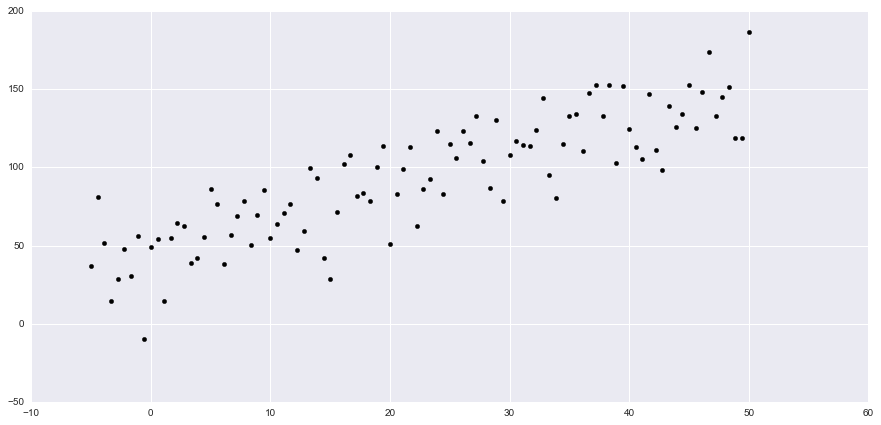

In [7]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')

## Naive/Baseline Prediction

What is the best prediction we can make for any data point if we can only use a single value?

How can we measure the success of our prediction?

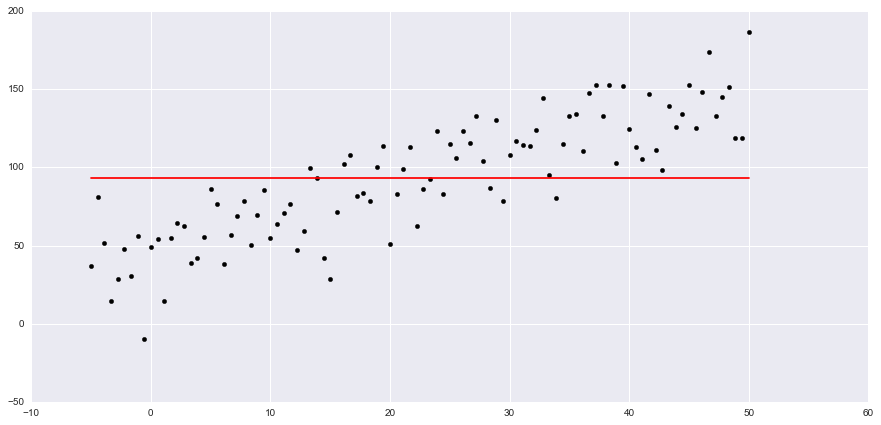

In [6]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(df['X'], df['Y'], c='k')
ax.plot((df['X'].min(), df['X'].max()),(np.mean(df['Y']), np.mean(df['Y'])), color='r');

## Let's add that to our DataFrame

In [8]:
df['Mean_Yhat'] = df['Y'].mean()
df

,X,Y,Mean_Yhat
0,-5.000000,37.010811,93.309759
1,-4.444444,81.019120,93.309759
2,-3.888889,51.487541,93.309759
3,-3.333333,14.675192,93.309759
4,-2.777778,28.858296,93.309759
5,-2.222222,47.911464,93.309759
6,-1.666667,30.810915,93.309759
7,-1.111111,56.156079,93.309759
8,-0.555556,-9.797429,93.309759
9,0.000000,48.967001,93.309759


## How can we calculate our prediction error?

<img src="https://snag.gy/9R57Or.jpg">

## For each x value there is the actual y and our predicted y

<img src="http://i.imgur.com/Qs9MwV9.jpg" width=500>

<img src="http://i.imgur.com/JYi1PBp.jpg">

# Let's calculate the MSE

In [9]:
df.head(3)

,X,Y,Mean_Yhat
0,-5.000000,37.010811,93.309759
1,-4.444444,81.019120,93.309759
2,-3.888889,51.487541,93.309759


In [11]:
df['Mean_Yhat_SE'] = np.square(df['Y'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

1517.9230016196525

## We can confirm this by using scikit-learn's mean_squared_error()

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Y'], df['Mean_Yhat'])
mse

1517.9230016196527

## How could we improve upon our original naive model?

Let y be a function of x

$y = mx + b$
<br>
or
<br>
$y = \beta_0 + \beta_1x_1$

So, we just need to find the parameters to plug in here that give us the smallest SSE.

## We saw how to do this in this morning's lecture

<img src="https://upload.wikimedia.org/math/e/e/d/eed68731d1230938d457c576deee1bcf.png">

## Exercise

Use the function we created in the earlier lecture, but this time have it return the MSE.
This time pass in the x and y values. Hint: use zip().

```python

def min_sse(my_list):
    
    xy_bar = pd.Series([x*y for x,y in my_list]).mean()
    x_bar = pd.Series([x[0] for x in my_list]).mean()
    y_bar = pd.Series([x[1] for x in my_list]).mean()
    x_sq_bar = pd.Series([x[0]**2 for x in my_list]).mean()
    x_bar_sq = x_bar**2
    
    m = (xy_bar - x_bar * y_bar)/(x_sq_bar - x_bar_sq)
    a = y_bar - m*x_bar
    
    return m, a
    
    
    
m, a = min_sse([[-1, 0], [1, 3], [2, 4], [3, 7], [4, 10]] )
```

In [13]:
# solution
def min_sse(my_list):
    
    xy_bar = pd.Series([x*y for x,y in my_list]).mean()
    x_bar = pd.Series([x[0] for x in my_list]).mean()
    y_bar = pd.Series([x[1] for x in my_list]).mean()
    x_sq_bar = pd.Series([x[0]**2 for x in my_list]).mean()
    x_bar_sq = x_bar**2
    
    m = (xy_bar - x_bar * y_bar)/(x_sq_bar - x_bar_sq)
    a = y_bar - m*x_bar
    
    y_hats = []
    y_true = []
    for x,y in my_list:
        y_hat = a + m*x
        y_hats.append(y_hat)
        y_true.append(y)
    
    mse = np.mean([np.square(yt-yh) for yt,yh in zip(y_true, y_hats)])
    
    return m, a, mse
    
    
    
m, a, mse = min_sse(zip(x,y))

print m, a, mse

2.07921568231 46.527405862 406.116021223


## Simple Linear Regression with Statsmodels

[Documentation](http://statsmodels.sourceforge.net/)

<img src="http://i.imgur.com/ap0fSjo.png" width=600>

## Let's run our model

In [14]:
import statsmodels.api as sm

# need to add an intercept in sm
X = sm.add_constant(x)

# fit the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     268.3
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           8.20e-30
Time:                        14:33:20   Log-Likelihood:                -442.23
No. Observations:                 100   AIC:                             888.5
Df Residuals:                      98   BIC:                             893.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         46.5274      3.507     13.266      0.0

## How to get the y_hat for each x

In [15]:
results.predict(X)

array([  36.13132745,   37.28644727,   38.4415671 ,   39.59668692,
         40.75180674,   41.90692657,   43.06204639,   44.21716621,
         45.37228604,   46.52740586,   47.68252569,   48.83764551,
         49.99276533,   51.14788516,   52.30300498,   53.4581248 ,
         54.61324463,   55.76836445,   56.92348427,   58.0786041 ,
         59.23372392,   60.38884374,   61.54396357,   62.69908339,
         63.85420321,   65.00932304,   66.16444286,   67.31956269,
         68.47468251,   69.62980233,   70.78492216,   71.94004198,
         73.0951618 ,   74.25028163,   75.40540145,   76.56052127,
         77.7156411 ,   78.87076092,   80.02588074,   81.18100057,
         82.33612039,   83.49124021,   84.64636004,   85.80147986,
         86.95659968,   88.11171951,   89.26683933,   90.42195916,
         91.57707898,   92.7321988 ,   93.88731863,   95.04243845,
         96.19755827,   97.3526781 ,   98.50779792,   99.66291774,
        100.81803757,  101.97315739,  103.12827721,  104.28339

## Let's put that in our DataFrame

In [16]:
df['OLS_Yhat'] = results.predict(X)
df

,X,Y,Mean_Yhat,Mean_Yhat_SE,OLS_Yhat
0,-5.000000,37.010811,93.309759,3169.571504,36.131327
1,-4.444444,81.019120,93.309759,151.059788,37.286447
2,-3.888889,51.487541,93.309759,1749.097920,38.441567
3,-3.333333,14.675192,93.309759,6183.395112,39.596687
4,-2.777778,28.858296,93.309759,4153.991029,40.751807
5,-2.222222,47.911464,93.309759,2061.005170,41.906927
6,-1.666667,30.810915,93.309759,3906.105511,43.062046
7,-1.111111,56.156079,93.309759,1380.395894,44.217166
8,-0.555556,-9.797429,93.309759,10631.092208,45.372286
9,0.000000,48.967001,93.309759,1966.280192,46.527406


## Again, let's calculate our MSE

In [17]:
df['OLS_Yhat_MSE'] = np.square(df['OLS_Yhat'] - df['Y'])
df['OLS_Yhat_MSE'].mean()

406.1160212225836

In [18]:
mse = mean_squared_error(df['Y'], df['OLS_Yhat'])
mse

406.11602122258358

In [19]:
df

,X,Y,Mean_Yhat,Mean_Yhat_SE,OLS_Yhat,OLS_Yhat_MSE
0,-5.000000,37.010811,93.309759,3169.571504,36.131327,0.773491
1,-4.444444,81.019120,93.309759,151.059788,37.286447,1912.546705
2,-3.888889,51.487541,93.309759,1749.097920,38.441567,170.197427
3,-3.333333,14.675192,93.309759,6183.395112,39.596687,621.080919
4,-2.777778,28.858296,93.309759,4153.991029,40.751807,141.455595
5,-2.222222,47.911464,93.309759,2061.005170,41.906927,36.054469
6,-1.666667,30.810915,93.309759,3906.105511,43.062046,150.090229
7,-1.111111,56.156079,93.309759,1380.395894,44.217166,142.537646
8,-0.555556,-9.797429,93.309759,10631.092208,45.372286,3043.697484
9,0.000000,48.967001,93.309759,1966.280192,46.527406,5.951623


## We can now plot our line

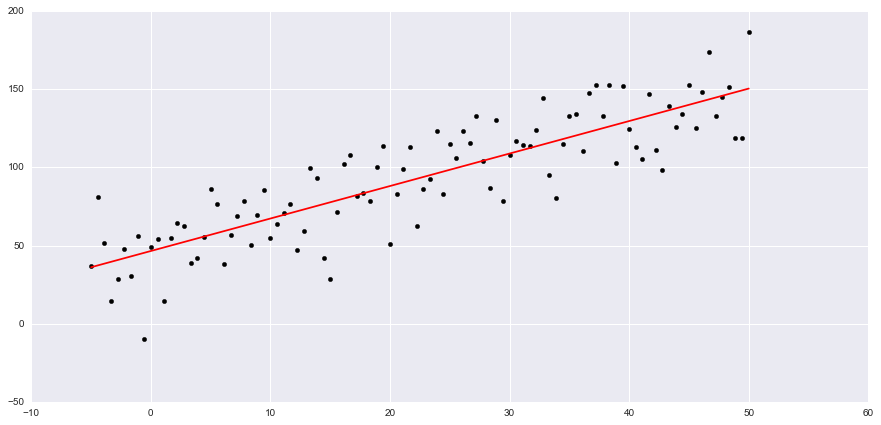

In [20]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(df['X'], df['OLS_Yhat'], color='r');

## We can also plot our residuals

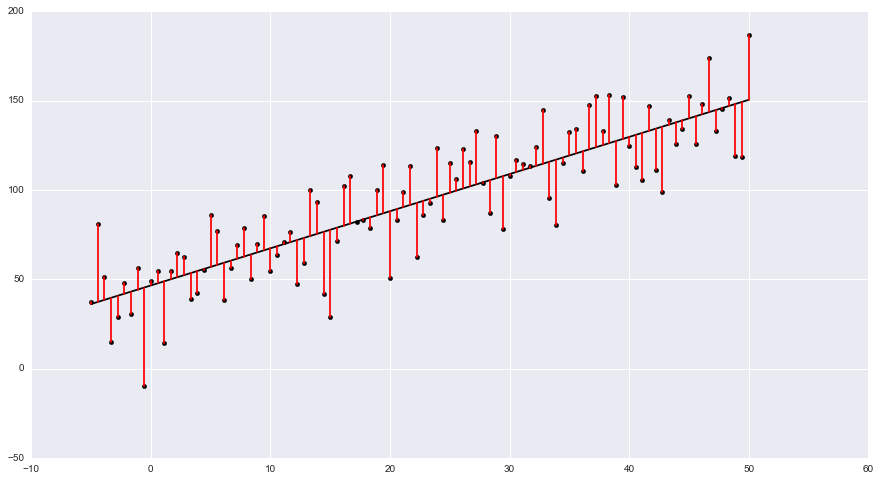

In [21]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=df['X'], y=df['Y'], c='k')
ax.plot(df['X'], df['OLS_Yhat'], color='k');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['X'], row['X']), (row['Y'], row['OLS_Yhat']), 'r-')

## How can we get the MSE from the model we created

In [22]:
results.mse_resid

414.4041032883506

## How do we get the betas (model coefficients)?

In [23]:
results.params

array([ 46.52740586,   2.07921568])

### Simple linear equation formula
$ y = \beta_0 + \beta_1X_1$

<br>
### Plug in the values from our model
$ y = 46.53 + 2.08X_1$

## Plotting the residuals

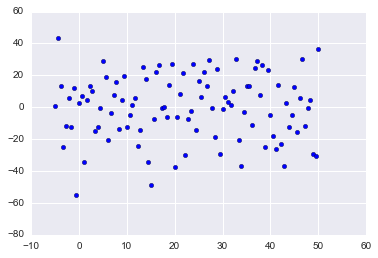

In [24]:
plt.scatter(x, results.resid)

## Exercise

Using stats models do/answer the following:
- Fit a model to the dataset (of cricket chirps per min by temperature) given below
- What is the equation of the line?
- What is the mse?
- Plot the data with the fitted line
- Plot the residuals - are they normal?

In [25]:
chirps = [(20, 88.59999847),
(16, 71.59999847),
(19.79999924, 93.30000305),
(18.39999962, 84.30000305),
(17.10000038, 80.59999847),
(15.5, 75.19999695),
(14.69999981, 69.69999695),
(17.10000038, 82),
(15.39999962, 69.40000153),
(16.20000076, 83.30000305),
(15, 79.59999847),
(17.20000076, 82.59999847),
(16, 80.59999847),
(17, 83.5),
(14.39999962, 76.30000305)]

In [26]:
cc = pd.DataFrame(chirps, columns=['x','y'])

In [27]:
cc.head(3)

,x,y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003


In [28]:
# need to add an intercept in sm
X = sm.add_constant(cc['x'])

# fit the model
model = sm.OLS(cc['y'], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     29.97
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           0.000107
Time:                        14:35:43   Log-Likelihood:                -40.348
No. Observations:                  15   AIC:                             84.70
Df Residuals:                      13   BIC:                             86.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         25.2323     10.060      2.508      0.0

/Users/ac/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [29]:
# get the mse of the residuals
results.mse_resid

14.657491494113152

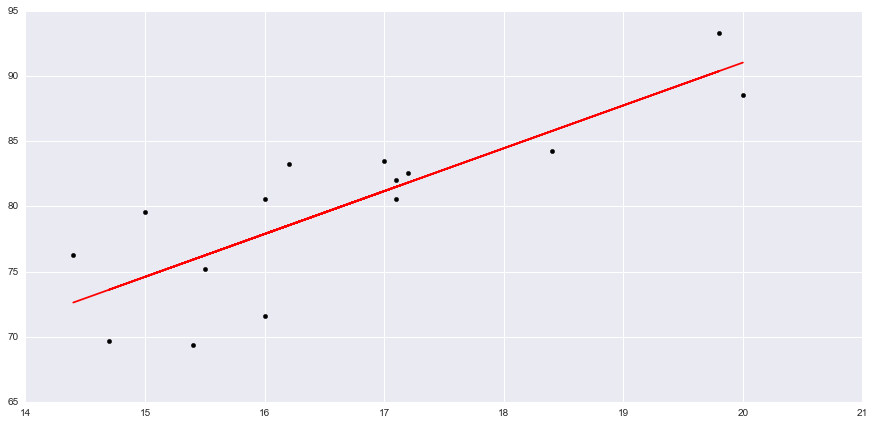

In [30]:
# create a figure and plot
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(cc['x'], cc['y'], c='k')
ax.plot(cc['x'], results.predict(X), color='r');

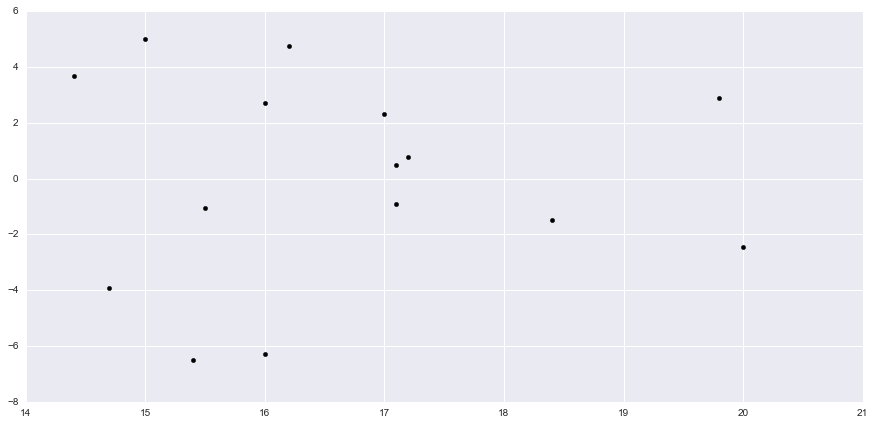

In [31]:
# create a figure and plot the resids
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(cc['x'], results.resid, c='k')

## Assumptions of linear regression

- Linear and additive relationship between dependent and independent variables
- Statistical independence of errors
- Homoskedasticity of errors (constant variance)
- Normality of errors (with a mean 0)

## Let's see a model that violates some of our assumptions

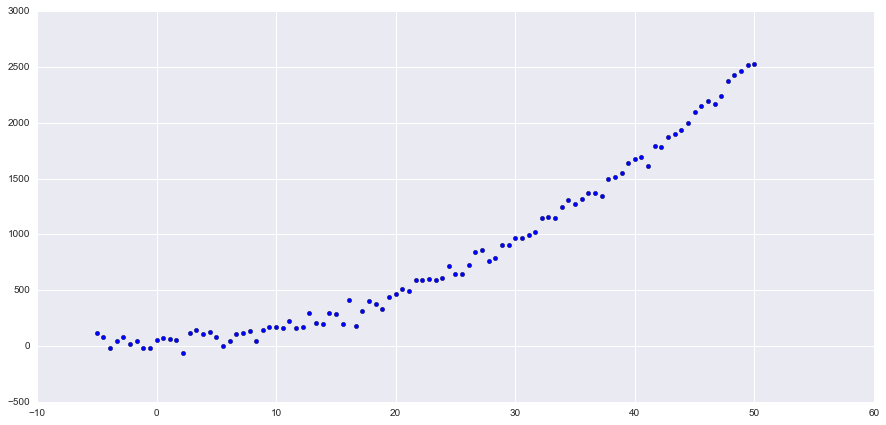

In [32]:
# create an x and a y that is 
# 50 plus 2 times x with some random noise around that
x = np.linspace(-5, 50, 100)
y = 50 + x ** 2 + np.random.normal(0, 50, size=len(x))

# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y)

## Let's fit a model to that

In [33]:
# need to add an intercept in sm
X = sm.add_constant(x)

# fit the model
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     957.9
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           2.18e-52
Time:                        14:36:30   Log-Likelihood:                -686.16
No. Observations:                 100   AIC:                             1376.
Df Residuals:                      98   BIC:                             1382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -201.7250     40.212     -5.017      0.0

## Let's plot our line

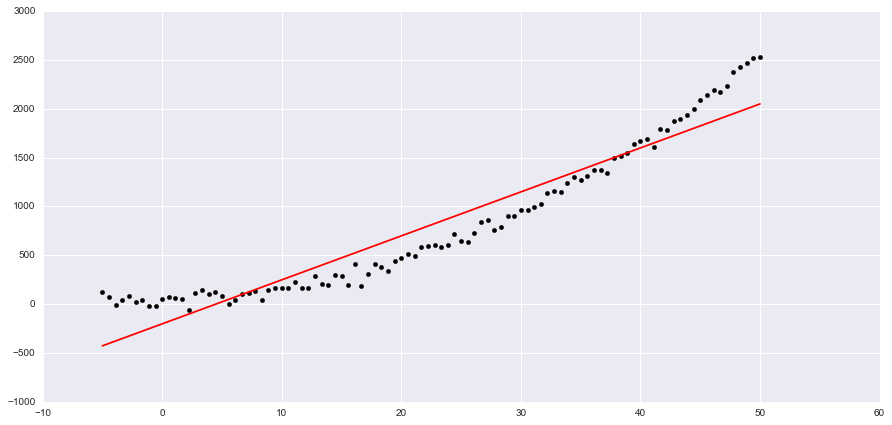

In [34]:
# create a figure
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x, y, c='k')
ax.plot(x, results.predict(X), color='r');

## What might the residuals on that look like?

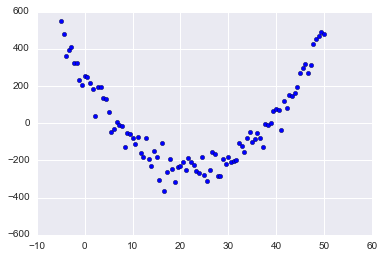

In [35]:
plt.scatter(x, results.resid)

## If I make a prediction using this model what will happen?

- Under what circumstances will the prediction be way off?

## Other issues in regression

- Multicollineary: When two or more independent variables are highly correlated
    - Does not affect predictive accuracy, but can cause model to be interpreted improperly (Check VIF)
    - [Read More](http://blog.minitab.com/blog/adventures-in-statistics-2/what-are-the-effects-of-multicollinearity-and-when-can-i-ignore-them)
- Heterskedasticity : The variance is not constant
    - [Read More](https://en.wikipedia.org/wiki/Heteroscedasticity)
    <img src="https://static1.squarespace.com/static/4f5694c424aca8d4f8e69194/t/51e9f5d6e4b07ef008368d84/1374287319317/Rplot.income.cone.jpg" width=300>
    
[Consequence of LR Assumptions](http://people.duke.edu/~rnau/testing.htm#independence)

## Transformations

In [36]:
mammals = pd.read_csv('~/Downloads/msleep.txt')

In [37]:
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [38]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
name            83 non-null object
genus           83 non-null object
vore            76 non-null object
order           83 non-null object
conservation    54 non-null object
sleep_total     83 non-null float64
sleep_rem       61 non-null float64
sleep_cycle     32 non-null float64
awake           83 non-null float64
brainwt         56 non-null float64
bodywt          83 non-null float64
dtypes: float64(6), object(5)
memory usage: 7.2+ KB


In [39]:
mammals.dropna(subset=['name', 'brainwt', 'bodywt'], inplace=True)

In [40]:
mammals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 82
Data columns (total 11 columns):
name            56 non-null object
genus           56 non-null object
vore            51 non-null object
order           56 non-null object
conservation    36 non-null object
sleep_total     56 non-null float64
sleep_rem       48 non-null float64
sleep_cycle     30 non-null float64
awake           56 non-null float64
brainwt         56 non-null float64
bodywt          56 non-null float64
dtypes: float64(6), object(5)
memory usage: 5.2+ KB


In [41]:
mammals = mammals[['name', 'bodywt', 'brainwt']].copy()

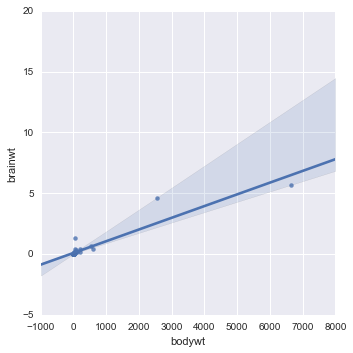

In [42]:
import seaborn as sns
sns.lmplot('bodywt', 'brainwt', mammals)

In [43]:
# need to add an intercept in sm
MX = sm.add_constant(mammals['bodywt'])
MY = mammals['brainwt']

# fit the model
mammal_model = sm.OLS(MY, MX)
mammal_results = mammal_model.fit()
print(mammal_results.summary())

                            OLS Regression Results                            
Dep. Variable:                brainwt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           9.16e-26
Time:                        14:38:43   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0859      0.048      1.782      0.0

## Let's plot our residuals

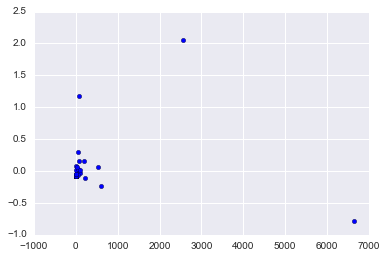

In [44]:
plt.scatter(mammals['bodywt'], mammal_results.resid)

## And let's take a look at our MSE

In [45]:
mammal_results.mse_resid

0.12434232239989523

## Let's try transforming our data by using log/log

In [46]:
mammals.loc[:, 'log_bodywt'] = np.log10(mammals['bodywt'])
mammals.loc[:, 'log_brainwt'] = np.log10(mammals['brainwt'])
mammals.head()

,name,bodywt,brainwt,log_bodywt,log_brainwt
1,Owl monkey,0.480,0.01550,-0.318759,-1.809668
3,Greater short-tailed shrew,0.019,0.00029,-1.721246,-3.537602
4,Cow,600.000,0.42300,2.778151,-0.373660
8,Dog,14.000,0.07000,1.146128,-1.154902
9,Roe deer,14.800,0.09820,1.170262,-1.007889


## We can now plot these

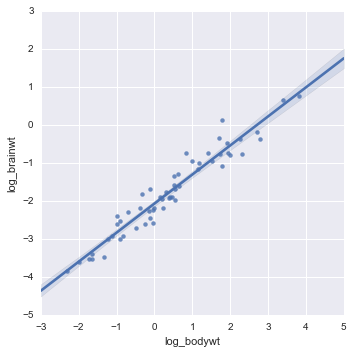

In [47]:
sns.lmplot('log_bodywt', 'log_brainwt', mammals)

## And refit our model

In [48]:
# need to add an intercept in sm
MX = sm.add_constant(mammals['log_bodywt'])
MY = mammals['log_brainwt']

# fit the model
mammal_model = sm.OLS(MY, MX)
mammal_results = mammal_model.fit()
print(mammal_results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_brainwt   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     738.4
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           3.56e-33
Time:                        14:41:10   Log-Likelihood:                -8.9817
No. Observations:                  56   AIC:                             21.96
Df Residuals:                      54   BIC:                             26.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.0739      0.040    -51.463      0.0

## Again, let's see our MSE

In [49]:
mammal_results.mse_resid

0.083681768842796489

## And plotting our residuals

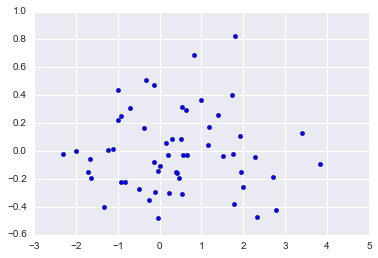

In [50]:
plt.scatter(mammals['log_bodywt'], mammal_results.resid)

## Regression with Scikit-Learn

[Documentation](http://scikit-learn.org/stable/index.html)

<img src="http://i.imgur.com/xMmmuxm.png" width=500>

## LR documentation

<img src="http://i.imgur.com/CNojpUU.png" width=500>

## Fitting a linear regression in sk-learn

In [52]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

# sklearn can be picky about the shape of your data
X = df['X'].values.reshape(-1, 1)
y = df['Y']

clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Getting our y_hats

In [53]:
# get our predictions
clf.predict(X)

array([  36.13132745,   37.28644727,   38.4415671 ,   39.59668692,
         40.75180674,   41.90692657,   43.06204639,   44.21716621,
         45.37228604,   46.52740586,   47.68252569,   48.83764551,
         49.99276533,   51.14788516,   52.30300498,   53.4581248 ,
         54.61324463,   55.76836445,   56.92348427,   58.0786041 ,
         59.23372392,   60.38884374,   61.54396357,   62.69908339,
         63.85420321,   65.00932304,   66.16444286,   67.31956269,
         68.47468251,   69.62980233,   70.78492216,   71.94004198,
         73.0951618 ,   74.25028163,   75.40540145,   76.56052127,
         77.7156411 ,   78.87076092,   80.02588074,   81.18100057,
         82.33612039,   83.49124021,   84.64636004,   85.80147986,
         86.95659968,   88.11171951,   89.26683933,   90.42195916,
         91.57707898,   92.7321988 ,   93.88731863,   95.04243845,
         96.19755827,   97.3526781 ,   98.50779792,   99.66291774,
        100.81803757,  101.97315739,  103.12827721,  104.28339

## Getting our intercept, betas, and MSE

In [54]:
# get our intercept
clf.intercept_

46.527405861950065

In [55]:
# get our coefficients
clf.coef_

array([ 2.07921568])

In [56]:
# get our mse
mean_squared_error(y, clf.predict(X))

406.11602122258358

## Exercise

Using the cricket data set, rerun the model using sklearn and answer the same questions as in the previous exercise

## Conclusion

In this lecture, we have discussed the following:
- The linear regression model
- How to fit a linear regression in both statsmodels and sklearn
- The assumptions of ols and the consequences of violating those assumptions
- How transformations can be beneficial to modeling